In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
# read data from csv file
df = pd.read_csv('car.csv')

In [164]:
# first five rows
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [165]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [166]:
# select feature that are use in this homework

col = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG','city mpg']
col

['Make',
 'Model',
 'Year',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Vehicle Style',
 'highway MPG',
 'city mpg']

In [167]:
# selected column that could be in homework #3
car_df = df[col]

In [168]:
# see few rows of dataframe
car_df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18


In [169]:
# info of car_df
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 837.8+ KB


# Data Preparation

In [170]:
car_df.columns = car_df.columns.str.replace(' ', '_').str.lower()

In [171]:
# column of car_df
car_df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg'],
      dtype='object')

In [172]:
car_df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
dtype: int64

In [173]:
# filling missing value with 0
car_df.fillna(0, inplace=True)

C:\Users\shahr\AppData\Local\Temp\ipykernel_11432\2969684638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df.fillna(0, inplace=True)


In [174]:
# check again is any missing value in car_df
car_df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
dtype: int64

In [175]:
# rename MSRP to price
price = df.rename(columns={'MSRP':'price'})

# Question 1

In [176]:
# most frequent observation for the column transmission_type
car_df['transmission_type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

In [177]:
# or we can use .mode()
mode = car_df['transmission_type'].mode()[0]

print('Most Frequent Observation/Mode of transmission_type columns :', mode)

Most Frequent Observation/Mode of transmission_type columns : AUTOMATIC


# Question no 2

In [178]:
# select numerical columns
num_col = car_df.select_dtypes('number')

<AxesSubplot:>

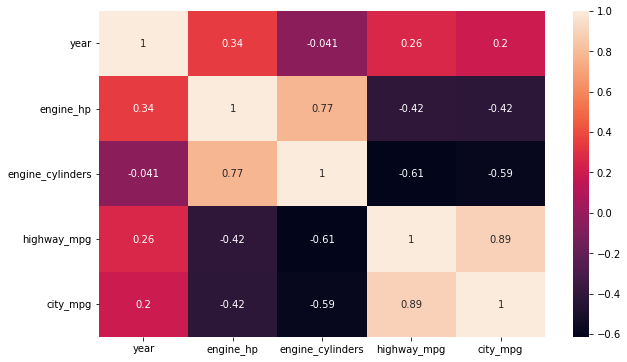

In [179]:
plt.figure(figsize=(10,6))
sns.heatmap(num_col.corr(), annot=True)

In [180]:
# engine_hp and year ----------------------> .34
# engine_hp and engine_cylinders ----------> .77
# highway_mpg and engine_cylinders --------> -.61
# highway_mpg and city_mpg ----------------> .89

In [181]:
price = price['price']

In [182]:
price

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: price, Length: 11914, dtype: int64

In [183]:
len(price)

11914

In [184]:
def f(col):
    output = []
    for i in range(len(col)):

        if price[i] > price.mean():
            output.append('1') 
        else:
            output.append('0') 

In [185]:
above_average = f(price)

In [186]:
above_average

In [187]:
output = []
for i in range(len(price)):
    if price[i] > price.mean():
        output.append(1) 
    else:
        output.append(0)

In [188]:
len(output)

11914

In [189]:
above_average = np.array(output)

In [190]:
above_average

array([1, 1, 0, ..., 1, 1, 0])

In [191]:
len(above_average[above_average == 1])

3269

In [192]:
len(above_average[above_average == 0])

8645

In [193]:
# recheck is acctually 3269 column values have above the mean
price[price > price.mean()]

0        46135
1        40650
6        44100
12       44400
15       48250
         ...  
11908    50520
11909    46120
11910    56670
11911    50620
11912    50920
Name: price, Length: 3269, dtype: int64

In [194]:
# recheck is acctually 8645 column values have above the mean
price[price < price.mean()]

2        36350
3        29450
4        34500
5        31200
7        39300
         ...  
11886    37700
11887    37900
11888    31300
11889    37700
11913    28995
Name: price, Length: 8645, dtype: int64

In [195]:
price.head(20)

0     46135
1     40650
2     36350
3     29450
4     34500
5     31200
6     44100
7     39300
8     36900
9     37200
10    39600
11    31500
12    44400
13    37200
14    31500
15    48250
16    43550
17     2000
18     2000
19     2000
Name: price, dtype: int64

In [196]:
price.mean()

40594.737032063116

In [197]:
above_average[10:20]

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [198]:
# split the data
from sklearn.model_selection import train_test_split

In [199]:
X_full, X_test, y_full, y_test = train_test_split(car_df, above_average, test_size=.20, random_state=42)

In [200]:
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=.25, random_state=42)

In [201]:
X_train.shape, X_val.shape, X_test.shape

((7148, 9), (2383, 9), (2383, 9))

In [202]:
y_train.shape, y_val.shape, y_test.shape

((7148,), (2383,), (2383,))

# Question 3

In [203]:
cat_col = X_train.select_dtypes('object')
cat_col

,make,model,transmission_type,vehicle_style
3972,Mitsubishi,Endeavor,AUTOMATIC,4dr SUV
1997,Kia,Borrego,AUTOMATIC,4dr SUV
5216,Lamborghini,Gallardo,MANUAL,Convertible
2805,Chevrolet,Colorado,AUTOMATIC,Crew Cab Pickup
11369,Pontiac,Vibe,AUTOMATIC,4dr Hatchback
...,...,...,...,...
9232,Toyota,Sienna,AUTOMATIC,Passenger Minivan
5710,Chevrolet,HHR,MANUAL,Wagon
11306,Hyundai,Veracruz,AUTOMATIC,4dr SUV
4414,Mitsubishi,Expo,MANUAL,2dr Hatchback


In [204]:
from sklearn.metrics import mutual_info_score

In [205]:
cat_col.columns

Index(['make', 'model', 'transmission_type', 'vehicle_style'], dtype='object')

In [206]:
# mutual info score between train categorical column with above_average(y_train)
print(round(mutual_info_score(cat_col.make, y_train),2))
print(round(mutual_info_score(cat_col.model, y_train),2))
print(round(mutual_info_score(cat_col.transmission_type, y_train),2))
print(round(mutual_info_score(cat_col.vehicle_style, y_train),2))

0.24
0.46
0.02
0.08


In [207]:
0.23976875439118345

0.23976875439118345

In [208]:
list(X_train.columns.values)

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg']

# Question 4

In [209]:
object_cols = list(X_train.select_dtypes('object').columns.values)

In [210]:
object_cols

['make', 'model', 'transmission_type', 'vehicle_style']

In [211]:
for col in object_cols:
    print(X_train[col].nunique())

48
869
5
16


In [212]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

# train_dict = df_train[categorical + numerical].to_dict(orient='records')
# X_train = dv.fit_transform(train_dict)

# val_dict = df_val[categorical + numerical].to_dict(orient='records')
# X_val = dv.transform(val_dict)

In [213]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [214]:
categorical = X_train.select_dtypes('object')
numerical = X_train.select_dtypes('number')

In [215]:
# use onehot encoding for categorical data into numerical
train = X_train.to_dict(orient='records')
X_train_new = dv.fit_transform(train)

In [216]:
# use onehot encoding for categorical data into numerical
val = X_val.to_dict(orient='records')
X_val_new = dv.transform(val)

In [217]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [218]:
# train the model with X_train_new

model.fit(X_train_new, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [219]:
# intercept of the model
model.intercept_[0]

-0.3922024649900234

In [220]:
# coeffficent of the model
model.coef_

array([[ 7.79818041e-02, -1.04954010e-01,  3.66488663e-02,
         2.85904810e-04,  1.40634194e+00,  1.87382194e+00,
         6.24604833e-01,  2.96123581e+00,  2.56631561e+00,
         1.85055860e-01,  3.26413131e-08, -4.83461162e-01,
         2.48262825e+00, -1.51923269e+00, -1.39463167e+00,
        -3.86492754e+00, -5.38596414e-01,  3.96447509e-01,
        -1.96162362e+00, -1.15226272e+00,  6.65873003e-01,
        -2.68844746e-01, -1.33588072e+00, -2.69399279e+00,
         2.95687686e-01, -1.52690322e+00,  1.12917751e-02,
         1.99176338e+00,  1.36294737e+00,  1.19627760e+00,
         4.09345385e+00,  1.10400811e+00,  5.11710165e-03,
        -1.68015776e+00,  4.91475610e-04,  9.52222999e-01,
        -2.08674802e+00, -1.07624086e+00, -1.49645574e+00,
        -3.90375866e-01, -3.28288690e+00,  2.00705466e+00,
         1.03350546e+00,  8.97306727e-01, -2.46849517e-01,
         3.52619253e-01, -2.80224636e+00, -1.98045948e+00,
         3.33584600e+00, -7.14516517e-01, -8.22545612e-0

In [221]:
y_pred = model.predict_proba(X_val_new)[:, 1]

In [222]:
decision = (y_pred >= .50)

In [223]:
score = (y_val == decision).mean()
score

0.9450272765421738

In [224]:
# we can calculate accuracy score by using sikit-learn function
from sklearn.metrics import accuracy_score

print('Accuracy Score of Validation data :', accuracy_score(y_val, model.predict(X_val_new)))

Accuracy Score of Validation data : 0.9450272765421738


In [225]:
# using round with two decimal point
round(score,2)

0.95

# Question 5

In [68]:
feature_coefficients = dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

In [66]:
del feature_coefficients['city_mpg']

In [69]:
feature_coefficients['city_mpg']

0.078

In [70]:
feature_coefficients

{'city_mpg': 0.078,
 'engine_cylinders': -0.105,
 'engine_hp': 0.037,
 'highway_mpg': 0.0,
 'make=Acura': 1.406,
 'make=Alfa Romeo': 1.874,
 'make=Aston Martin': 0.625,
 'make=Audi': 2.961,
 'make=BMW': 2.566,
 'make=Bentley': 0.185,
 'make=Bugatti': 0.0,
 'make=Buick': -0.483,
 'make=Cadillac': 2.483,
 'make=Chevrolet': -1.519,
 'make=Chrysler': -1.395,
 'make=Dodge': -3.865,
 'make=FIAT': -0.539,
 'make=Ferrari': 0.396,
 'make=Ford': -1.962,
 'make=GMC': -1.152,
 'make=Genesis': 0.666,
 'make=HUMMER': -0.269,
 'make=Honda': -1.336,
 'make=Hyundai': -2.694,
 'make=Infiniti': 0.296,
 'make=Kia': -1.527,
 'make=Lamborghini': 0.011,
 'make=Land Rover': 1.992,
 'make=Lexus': 1.363,
 'make=Lincoln': 1.196,
 'make=Lotus': 4.093,
 'make=Maserati': 1.104,
 'make=Maybach': 0.005,
 'make=Mazda': -1.68,
 'make=McLaren': 0.0,
 'make=Mercedes-Benz': 0.952,
 'make=Mitsubishi': -2.087,
 'make=Nissan': -1.076,
 'make=Oldsmobile': -1.496,
 'make=Plymouth': -0.39,
 'make=Pontiac': -3.283,
 'make=Porsch

In [71]:
small = ['year','engine_hp','transmission_type','city_mpg']

In [72]:
X_train[small].iloc[:10].to_dict(orient='records')

[{'year': 2011,
  'engine_hp': 225.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 15},
 {'year': 2009,
  'engine_hp': 276.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 17},
 {'year': 2012,
  'engine_hp': 570.0,
  'transmission_type': 'MANUAL',
  'city_mpg': 12},
 {'year': 2016,
  'engine_hp': 200.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 20},
 {'year': 2009,
  'engine_hp': 158.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 20},
 {'year': 2011,
  'engine_hp': 160.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 21},
 {'year': 2016,
  'engine_hp': 240.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 23},
 {'year': 2016,
  'engine_hp': 420.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 15},
 {'year': 2016,
  'engine_hp': 305.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 17},
 {'year': 2007,
  'engine_hp': 295.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 13}]

In [73]:
dicts_train_small = X_train[small].to_dict(orient='records')
dicts_val_small = X_val[small].to_dict(orient='records')

In [74]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [75]:
dv_small.get_feature_names_out()

array(['city_mpg', 'engine_hp', 'transmission_type=AUTOMATED_MANUAL',
       'transmission_type=AUTOMATIC', 'transmission_type=DIRECT_DRIVE',
       'transmission_type=MANUAL', 'transmission_type=UNKNOWN', 'year'],
      dtype=object)

In [76]:
X_train_small = dv_small.transform(dicts_train_small)

In [77]:
model_small = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model_small.fit(X_train_small, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [78]:
w0 = model_small.intercept_[0]
w0

-0.004937241212844349

In [79]:
w = model_small.coef_[0]
w.round(3)

array([ 0.084,  0.028,  0.124,  0.288, -0.025, -0.385, -0.007, -0.005])

In [80]:
X_val_small = dv_small.transform(dicts_val_small)

In [81]:
accuracy_score(y_val, model_small.predict(X_val_small))

0.8850188837599664

In [82]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'city_mpg': 0.084,
 'engine_hp': 0.028,
 'transmission_type=AUTOMATED_MANUAL': 0.124,
 'transmission_type=AUTOMATIC': 0.288,
 'transmission_type=DIRECT_DRIVE': -0.025,
 'transmission_type=MANUAL': -0.385,
 'transmission_type=UNKNOWN': -0.007,
 'year': -0.005}

In [83]:
feature_coefficients['city_mpg']

0.078

In [84]:
feature_coefficients['engine_hp']

0.037

In [85]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [86]:
sigmoid(-0.004937241212844349)

0.49876569220411454

In [87]:
feature_coefficients = dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

In [88]:
least_useful = {}
for key, value in feature_coefficients.items():
   if value == 0:
    least_useful[key] = value

In [89]:
least_col = list(least_useful.keys())

In [90]:
least_model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [91]:
train = X_train[least_col].to_dict(orient='rows')

KeyError: "['make=Bugatti', 'make=McLaren', 'model=323', 'model=458 Italia', 'model=570S', 'model=599', 'model=ALPINA B6 Gran Coupe', 'model=ALPINA B7', 'model=Aspire', 'model=Aventador', 'model=CTS-V', 'model=CTS-V Coupe', 'model=CTS-V Wagon', 'model=Carrera GT', 'model=Continental Flying Spur Speed', 'model=Continental GT Speed', 'model=Continental GT Speed Convertible', 'model=Continental GTC', 'model=Continental GTC Speed', 'model=Continental Supersports', 'model=Continental Supersports Convertible', 'model=Dawn', 'model=Excel', 'model=F12 Berlinetta', 'model=FF', 'model=Festiva', 'model=G3', 'model=Horizon', 'model=Huracan', 'model=Justy', 'model=LFA', 'model=M5', 'model=M6', 'model=M6 Gran Coupe', 'model=MP4-12C', 'model=Mighty Max Pickup', 'model=Murcielago', 'model=Omni', 'model=Precis', 'model=RS 7', 'model=Ram 50 Pickup', 'model=Ram Wagon', 'model=Reventon', 'model=S8', 'model=SLR McLaren', 'model=SLS AMG', 'model=SLS AMG GT', 'model=SLS AMG GT Final Edition', 'model=Samurai', 'model=Shelby GT500', 'model=Spirit', 'model=Vanwagon', 'model=Veyron 16.4', 'model=Wraith', 'model=X5 M', 'model=X6 M'] not in index"

### traing model with all feature

In [92]:
dv_new = DictVectorizer(sparse=False)

In [93]:
train = X_train.to_dict(orient='records')
X_train_few = dv_new.fit_transform(train)

In [94]:
val = X_val.to_dict(orient='records')
X_val_few = dv_new.transform(val)

In [95]:
model_few = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [96]:
model_few.fit(X_train_few, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [97]:
accuracy_score(y_val, model_few.predict(X_val_few))

0.9450272765421738

### model train without year columns

In [98]:
dv_y = DictVectorizer(sparse=False)

In [99]:
train = X_train.drop('year', axis=1)
train = train.to_dict(orient='records')
new_X = dv.fit_transform(train)

val = X_val.drop('year', axis=1)
val = val.to_dict(orient='records')
val_X = dv.transform(val)

model_or = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model_or.fit(new_X, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [100]:
accuracy_score(y_val, model_or.predict(val_X))

0.9479647503147294

### model train with engine_hp

In [101]:
dv_hp = DictVectorizer(sparse=False)

In [102]:
train = X_train.drop('engine_hp', axis=1)
train = train.to_dict(orient='records')
new_X = dv.fit_transform(train)

val = X_val.drop('engine_hp', axis=1)
val = val.to_dict(orient='records')
val_X = dv.transform(val)

model_hp = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model_hp.fit(new_X, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [103]:
accuracy_score(y_val, model_hp.predict(val_X))

0.9278220730172052

### train without transmission_type

In [104]:
dv_ty = DictVectorizer(sparse=False)

In [105]:
train = X_train.drop('transmission_type', axis=1)
train = train.to_dict(orient='records')
new_X = dv.fit_transform(train)

val = X_val.drop('transmission_type', axis=1)
val = val.to_dict(orient='records')
val_X = dv.transform(val)

model_ty = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model_ty.fit(new_X, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [106]:
accuracy_score(y_val, model_ty.predict(val_X))

0.9450272765421738

### traint without city_mpg

In [107]:
dv_mpg = DictVectorizer(sparse=False)

In [108]:
train = X_train.drop('city_mpg', axis=1)
train = train.to_dict(orient='records')
new_X = dv.fit_transform(train)

val = X_val.drop('city_mpg', axis=1)
val = val.to_dict(orient='records')
val_X = dv.transform(val)

model_mpg = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model_mpg.fit(new_X, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [109]:
accuracy_score(y_val, model_mpg.predict(val_X))

0.9324381032312211

In [ ]:
# We see that if we train wihtout city_mpg then it have smallest accuracy difference


# Question 6

In [110]:
price_log = np.log1p(price)

In [111]:
X_full, X_test, y_full, y_test = train_test_split(car_df, price_log, test_size=.20, random_state=42)

In [112]:
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=.25, random_state=42)

In [113]:
Dv = DictVectorizer(sparse=False)

In [114]:
train = X_train.to_dict(orient='records')
X_train_new = Dv.fit_transform(train)

In [115]:
val = X_val.to_dict(orient='records')
X_val_new = Dv.transform(val)

In [116]:
test = X_test.to_dict(orient='records')
X_test_new = Dv.transform(test)

In [123]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [124]:
ridge = Ridge(alpha=.01, random_state=42, solver='sag')

In [125]:
ridge.fit(X_train_new, y_train)

C:\Users\shahr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=0.01, random_state=42, solver='sag')

In [141]:
pred = ridge.predict(X_val_new)
np.sqrt(mean_squared_error(y_val, pred))

0.4867945519275277

In [140]:
from sklearn.metrics import mean_squared_error

In [138]:
true = np.array(y_val)

In [148]:
error_val = {}
error_tet = {}

for alpha in [0, 0.01, 0.1, 1, 10]:
    np.random.seed(42)
    ri_model = Ridge(alpha=alpha, solver='sag')
    ri_model.fit(X_train_new, y_train)
    pred = ri_model.predict(X_val_new)
    error = np.sqrt(mean_squared_error(y_val, pred))
    error_val[alpha] = error
    
    pred_test = ri_model.predict(X_test_new)
    error_test = np.sqrt(mean_squared_error(y_test, pred_test))
    error_tet[alpha] = error_test

C:\Users\shahr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shahr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shahr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shahr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shahr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

In [149]:
error_val

{0: 0.48679431324238753,
 0.01: 0.4867945519275277,
 0.1: 0.4867967000189975,
 1: 0.48681817454327286,
 10: 0.48703228329751275}

In [150]:
error_tet

{0: 0.4863824179025208,
 0.01: 0.48638261745660316,
 0.1: 0.4863844133935686,
 1: 0.48640236868304854,
 10: 0.48658151438379793}

In [151]:
# we see that with alpha = 0 ,rmse is less compare to other alpha value 

# End

In [144]:
r_model.fit(X_train_new, y_train)

C:\Users\shahr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=0.01, solver='sag')

In [145]:
pred = r_model.predict(X_val_new)
np.sqrt(mean_squared_error(y_val, pred))

0.4867945519275277

In [385]:
rmse = {}

for alpha in [0, 0.01, 0.1, 1, 10]:
    ridge = Ridge(alpha=alpha, random_state=42, solver='sag')
    ridge.fit(X_train_new, y_train)
    pred = ridge.predict(X_val_new)
    error =  np.sqrt(mean_squared_error(y_val, pred))
    rmse[alpha] = round(error, 3)

C:\Users\shahr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shahr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shahr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shahr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shahr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

In [386]:
rmse

{0: 0.487, 0.01: 0.487, 0.1: 0.487, 1: 0.487, 10: 0.487}

In [362]:
for alpha in [0, 0.01, 0.1, 1, 10]:
    print(alpha)

0
0.01
0.1
1
10


In [353]:
.95 - accuracy_score(y_val, model_mpg.predict(val_X))

0.01756189676877884

In [200]:
# Calculate the absolute values of coefficients
abs_coefficients = {feature: abs(coef) for feature, coef in feature_coefficients.items()}

# Find the feature with the smallest absolute coefficient
least_useful_feature = min(abs_coefficients, key=abs_coefficients.get)

# Get the coefficient value for the least useful feature
least_useful_coefficient = feature_coefficients[least_useful_feature]

print(f"The least useful feature is '{least_useful_feature}' with coefficient {least_useful_coefficient}")

The least useful feature is 'highway_mpg' with coefficient 0.0


In [195]:
dv.get_feature_names_out()

array(['city_mpg', 'engine_cylinders', 'engine_hp', 'highway_mpg',
       'make=Acura', 'make=Alfa Romeo', 'make=Aston Martin', 'make=Audi',
       'make=BMW', 'make=Bentley', 'make=Bugatti', 'make=Buick',
       'make=Cadillac', 'make=Chevrolet', 'make=Chrysler', 'make=Dodge',
       'make=FIAT', 'make=Ferrari', 'make=Ford', 'make=GMC',
       'make=Genesis', 'make=HUMMER', 'make=Honda', 'make=Hyundai',
       'make=Infiniti', 'make=Kia', 'make=Lamborghini', 'make=Land Rover',
       'make=Lexus', 'make=Lincoln', 'make=Lotus', 'make=Maserati',
       'make=Maybach', 'make=Mazda', 'make=McLaren', 'make=Mercedes-Benz',
       'make=Mitsubishi', 'make=Nissan', 'make=Oldsmobile',
       'make=Plymouth', 'make=Pontiac', 'make=Porsche',
       'make=Rolls-Royce', 'make=Saab', 'make=Scion', 'make=Spyker',
       'make=Subaru', 'make=Suzuki', 'make=Tesla', 'make=Toyota',
       'make=Volkswagen', 'make=Volvo', 'model=1 Series', 'model=100',
       'model=124 Spider', 'model=190-Class', 'model

In [184]:
model.predict_proba(X_val_new)[:, 1]

array([8.45426579e-04, 9.96341923e-01, 1.49816720e-04, ...,
       2.62411354e-04, 9.89700971e-01, 9.87620006e-01])

In [149]:
X_train.iloc[:3,:]

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12


In [151]:
X_train.iloc[:3,:].to_dict(orient='records')

[{'make': 'Mitsubishi',
  'model': 'Endeavor',
  'year': 2011,
  'engine_hp': 225.0,
  'engine_cylinders': 6.0,
  'transmission_type': 'AUTOMATIC',
  'vehicle_style': '4dr SUV',
  'highway_mpg': 19,
  'city_mpg': 15},
 {'make': 'Kia',
  'model': 'Borrego',
  'year': 2009,
  'engine_hp': 276.0,
  'engine_cylinders': 6.0,
  'transmission_type': 'AUTOMATIC',
  'vehicle_style': '4dr SUV',
  'highway_mpg': 21,
  'city_mpg': 17},
 {'make': 'Lamborghini',
  'model': 'Gallardo',
  'year': 2012,
  'engine_hp': 570.0,
  'engine_cylinders': 10.0,
  'transmission_type': 'MANUAL',
  'vehicle_style': 'Convertible',
  'highway_mpg': 20,
  'city_mpg': 12}]

In [152]:
numerical.to_dict(orient='records')

[{'year': 2011,
  'engine_hp': 225.0,
  'engine_cylinders': 6.0,
  'highway_mpg': 19,
  'city_mpg': 15},
 {'year': 2009,
  'engine_hp': 276.0,
  'engine_cylinders': 6.0,
  'highway_mpg': 21,
  'city_mpg': 17},
 {'year': 2012,
  'engine_hp': 570.0,
  'engine_cylinders': 10.0,
  'highway_mpg': 20,
  'city_mpg': 12},
 {'year': 2016,
  'engine_hp': 200.0,
  'engine_cylinders': 4.0,
  'highway_mpg': 27,
  'city_mpg': 20},
 {'year': 2009,
  'engine_hp': 158.0,
  'engine_cylinders': 4.0,
  'highway_mpg': 26,
  'city_mpg': 20},
 {'year': 2011,
  'engine_hp': 160.0,
  'engine_cylinders': 4.0,
  'highway_mpg': 30,
  'city_mpg': 21},
 {'year': 2016,
  'engine_hp': 240.0,
  'engine_cylinders': 4.0,
  'highway_mpg': 34,
  'city_mpg': 23},
 {'year': 2016,
  'engine_hp': 420.0,
  'engine_cylinders': 8.0,
  'highway_mpg': 21,
  'city_mpg': 15},
 {'year': 2016,
  'engine_hp': 305.0,
  'engine_cylinders': 6.0,
  'highway_mpg': 24,
  'city_mpg': 17},
 {'year': 2007,
  'engine_hp': 295.0,
  'engine_cylind